<h1>Generación de sobretonos musicales</h1>

|Apellidos|Nombres|Especialidad|Código|
|:--|:--|:--|:--|
|Araujo Calderon|Patrick Willians|Ingeniería física|20220588A|
|Neyra Otoya|Alejandro Oswaldo|Ingeniería física|20220577J|
|Romero Calero|Nelson Samir|Física|20222160I|
|Santa Cruz Basilio|Jesus Diego|Ciencia de la computación|20235005G|

## 1. Resumen
En el presente proyecto, implementaremos un programa el cual genere cinco tonos musicales similares a una guitarra aleatoriamente. Para ello, importaremos librerías que nos ayudarán a desarrollar e implementar el programa, este programa creará archivos `WAV`, reproducirá una melodía aleatoria en la escala pentatónica menor, mostrará un gráfico en el cual que muestra la perdía de energía de la nota tocada y tendrá un modo para tocar las notas en modo piano. Usaremos el código fuente base de Mahesh Venkitachalam para desarrollar nuestro código e iremos implementando y corrigiendo algunos errores de este código base, todo el desarrollo e implementación lo haremos en el lenguaje python 3. 

## 2. Introducción
### 2.1. Presentación del algoritmo de Karplus-Strong 
Para comenzar a desarrollar nuestro código, primero hay que entender como funciona el algoritmo de Karplus-Strong. El algoritmo es un método de síntesis de sonido basado en el modelado físico, que se utiliza principalmente para simular el sonido de una cuerda pulsada o golpeada, por ejemplo, como es el caso de una guitarra o de un piano. La idea básica del algoritmo es eliminar los frecuencias más altas para que el sonido de la notas se escuche más natural. Para eso, pasaremos a las ondas mediante un pasa-bajos que se multiplica por un factor de atenuación y así simule la perdía de energía de las notas musicales.
### 2.2. La escala pentatónica
La escala hace referencia a una serie de pasos o escalones que ascienden o desciende gradualmente. En la música, los escalones son las notas musicales. Cuando usamos notas de distinta afinación que ascienden o descienden de manera organizada y con distancias determinadas entre una y otra, estamos formando una escala.

Para analizar una **escala musical** necesitamos entender un concepto funamental: el **intervalo musical**. El intervalo es la distancia que hay entre una y otra. La medida que usamos para determinar esto es una unidad musical a la que le llamamos **"tono"**. Finalmente, la otra unidad fundamental para medir intervalos es el **"semitono"** que no es más que medio tono.

Para entender mejor este concepto puedesver un piano, ya que es muy útil para poder visualizar las distancias entre las notas. Si mira las teclas, notarás que hay blancas y negras. Debes saber que hay un tono completo entreuna y otra nota cuando hay una tecla de por medio. Otra forma de verlo es que la distancia que hay entre una tecla y otra, sin importar el color, es un semitono. Por ejemplo, podemos ver que entre Do y Re hay una tecla negra, así que su distancia que es 1 tono completo.

La palabra pentatónica, se compone de dos conceptos: "*penta*" que significa cinco, y "*tónica*" que se refiere tono. Si funcionamos estos conceptos obtenemos que la escala pentatónica significa "*la escala de cinco tonos*".Precisamente esta escala se compone de 5 notas distintas y existen varias que cumplen estos requisitos, sin embargo la más utilizada son **la escal pentatónica mayor** y **la escala pentatónica menor**.

Una particularidad esencial de esta escala es que **no tiene semitonos**, como la muchas de las otras escalas.

#### 2.2.1. La escala pentatónica mayor
Si tocamos la escala pentatónica mayor de Do en el piano, las notas serían:

$$Do,\ Re,\ Mi,\ Sol,\ La,\ DO\ (para\ terminar\ en \ la\ octava)$$

De alguna manera podríamos decir que esta escala evita los medios tonos, es decir que omitimos intervalos entre $Mi y Fa$ y entre $Si y Do$. Otra forma de aprender a formar un escala pentatónica es midiendo la distancias entre una nota y otra. Las distancias para la escala pentatónica mayor son los siguiente:
$un\ tono-un\ tono-(un\ tono+medio\ tono)-un\ tono-(un\ tono+medio\ tono)$

#### 2.2.2. La escala pentatónica menor
Como en cualquier otra, una escala se convierte en menor al disminuir la tercera y la séptima nota por medio tono (*tercera menor* y *séptima menor*). Si tomamos la escala de *Do* mayor
como ejemplo, modificamos la tercera, la séptima y eliminamos de nuevo las distancias de semitono, la escala pentatónica menor sería así:
$$Do,\ Mib,\ Fa,\ Sol,\ Bb,\ Do$$
La distancias serían las siguiente: $(un\ tono+medio\ tono)-un\ tono-un\ tono-(un\ tono+medio\ tono)-un\ tono-$
La escala pentatónica menor es muy utilizada por su sonoridad en los estilos de bluez y jazz. Finalmente debemos saber que como en cualquier otra, **las escalas pueden comenzar en cualquier nota**(no necesariamente en *Do*). Para tocar la escala pentatónica en otra tonalidad lo única que debes hacer es empezar en una tecla y respetar las distancias que mencionamos entre cada una de las notas.

## 3. Objetivos
### 3.1. Objetivos generales
- Crear el archivo `WAV` usando el módulo *wave*.
- Reproducir el archivo `WAV` creado usando el módulo *pygame*.

### 3.2. Objetivos específicos
- Crear el búfer circular usando la clase *deque* en Python.
- Crear las matrices incorporando los módulos *numpy* y *ufuncs*.
- Generar los tonos y sobretonos musicales de las notas de la escala pentatónica menor de *Do* usando *el algoritmo de Karplus-Strong*.
- Generar gráficos usando el módulo matplotlib.

## 4. Implementación y demostración de resultados
En esta sección, nos centraremos en el desarrollo e implementación del código, el cual lo dividiremos en 7 partes, para explicar paso a paso que hace cada línea, para ello comentaremos las lineas, que son necesarias para el entendimiento de esta. Primero, entenderemos las métodos que usaremos de la clase `deque`. Segundo, desarrollaremos un programa que genera un archivo WAV. Tercero, desarrollaremos el algoritmo Karplus-Strong para luego implementarlo en la función principal.
### 4.1. Métodos de la clase deque


In [1]:
#Importamos la clase deque
from collections import deque

#Genere un objeto "d" de la clase deque de 10 elementos de 0 hasta 9
d=deque(range(10))
#Imprime el objeto "d" y la función str() convierte a el objeto "d" a un string
print(str(d))

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [2]:
#Añade al elemento -1 al final de la lista
d.append(-1)
print(str(d))

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1])


In [3]:
#el método popleft devuelve y elimina el elemento que se encuentra al inicio de la lista
value=d.popleft()
print(str(d))
print(str(value))

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, -1])
0


### 4.2. Creando un archivo WAV

In [4]:
# Importamos los módulos necesarios
import numpy as np
import wave, math
import matplotlib.pyplot as plt

#Crea la variable Sample rate y asigna el valor de 44100
sRate = 44100
#Crea la variable nSample y asigna el valor de sRate multiplicado por 5
nSamples = sRate * 5

# Crea un ndarray de tamaño de nSamples de elementos que va desde 0 hasta nSample-1,
# y todos los elementos son divididos entre el float sRate
x = np.arange(nSamples)/float(sRate)
#Crea un ndarray "vals" en función a los elementos del ndarray "x"
vals = np.sin(2.0*math.pi*220*x)

# luego de generar la amplitud crearemos el archivo, los valores de la onda sinusoidal calculados en el rango [-1,1] se
# escalan a valores de 16 bits y se convierten a una cadena de caracteres.
data = np.array(vals*32767, 'int16').tobytes()
#Abre el archivo sine.wav usando el método wave.open() (en el caso de que no sea haya creado, crea un archivo del tipo wav) 
file = wave.open('sine22O.wav', 'wb')

# Agregamos los parametros necesarios para configurar el archivo WAV.
file.setparams((1, 2, sRate, nSamples, 'NONE', 'uncompressed'))

# Escribimos el archivo WAV usando los parametros anteriormente agregados:
file.writeframes(data)

# Cerramos el archivo para volcar las cambios
file.close()

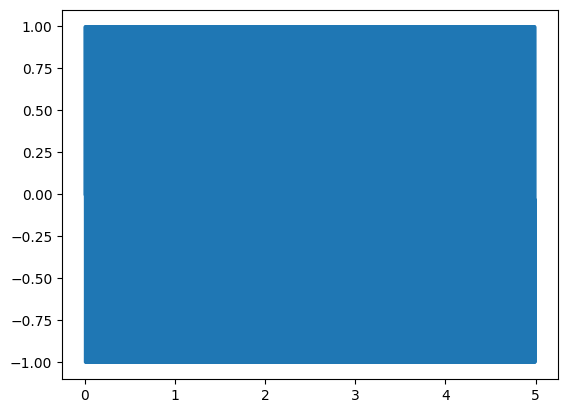

In [5]:
#Crea un gráfico en el cual los valores de las abscisas es el ndarray "x"
# y los valores de las ordenadas es el ndarray "vals"
plt.plot(x,vals)
plt.show()


### 4.3. Implementación del algoritmo de Karplus-Strong

In [8]:
# Genera una nota según el parametro de frecuencia ingresado
def generateNote(freq):
    #freq=220
    nSamples = 44100
    sampleRate = 44100
    N = int(sampleRate/freq)
    # initialize ring buffer
    buf = deque([random.random() - 0.5 for i in range(N)])
    # init sample buffer
    samples = np.array([0]*nSamples, 'float32')
    for i in range(nSamples):
        samples[i] = buf[0]
        avg = 0.995*0.5*(buf[0] + buf[1])
        buf.append(avg)
        buf.popleft() 
    # plot of flag set 
        if gShowPlot:
            if i % 1000 == 0:
                plt.axline.set_ydata(buf)
                plt.draw()
    # samples to 16-bit to string
    # max value is 32767 for 16-bit
        samples = np.array(samples * 32767, 'int16')
        print(samples.tostring())
    return samples.tostring()

### 4.4. Implementación de la función writeWAVE
Para la creación de archivos .wav definimos la función writeWAVE donde se usa los parámetros:
- nChannels :  Número de canales de audio.
- sampleWidth: Ancho de muestra en bytes.
- frameRate :  Tasa de muestreo en tasas por segundo.
- nFrames   :  Número total de fotogramas de audio en el archivo.

In [ ]:
#Define la función que escribe el archivo WAV
def writeWAVE(fname,data):
    #Abrir archivo
    file=wave.open(fname,'wb')
    #Parámetros del archivo WAV
    nChannels=1
    sampleWidth=2
    frameRate=44100
    nFrames=44100
    #Configurar los parámetros
    file.setparams((nChannels, sampleWidth, frameRate, nFrames, 'NONE', 'noncompressed'))
    file.writeframes(data)
    file.close()

### 4.5. Implementación de la clase NotePlayer
esta clase NotePlayer proporciona una interfaz para agregar notas de audio WAV y reproducirlas utilizando Pygame.

In [ ]:
#Reproduce un archivo WAV
class NotePlayer:
    # constructor
    def __init__(self):
        pygame.mixer.pre_init(44100, -16, 1, 2048)
        pygame.init()
        #Diccionario de notas
        self.notes = {}
    #Añade una nota al diccionario self.notes
    def add(self, fileName):
        self.notes[fileName] = pygame.mixer.Sound(fileName)
    #Tocando una nota
    def play(self, fileName):
        try:
            self.notes[fileName].play()
        except:
            print(fileName + ' no encontrado!')
    def playRandom(self):
        """Toca una nota aleatoria"""
        index = random.randint(0, len(self.notes)-1)
        note = list(self.notes.values())[index]
        note.play()
        return index

### 4.6. Implementación de la función main

In [ ]:
def main():
    parser=argparse.ArgumentParser(description="Generating sounds with Karplus String Algorithm")
    #Añade cuatro argumentos opcionales para inicializar
    parser.add_argument('--display', action='store_true',required=False)
    parser.add_argument('--play', action='store_true',required=False)
    parser.add_argument('--piano', action='store_true',required=False)
    args=parser.parse_args()

    #Muestra gráficos si el argumento --mostrar se ingreso por la línea de comandos
    if args.display:
        gShowPlot = True
        plt.ion()

    #Crear una instancia de la clase NotePlayer
    nplayer = NotePlayer()

    print('creating note...')
    for name, freq in list(pmNotes.items()):
        fileName=name+'.wav'
        if not os.path.exists(fileName) or args.display:
            data=generateNote(freq)
            print('creating '+fileName+'...')
            writeWAVE(fileName,data)
        else:
            print('fileName already created. skipping...')
            #Añade notas al diccionario de la clase NotePlayer.
            nplayer.add(name+'.wav')

            #Reproduce una nota si el valor de args.display es True.
            if args.display:
                nplayer.play(name+'.wav')
                time.sleep(0.5)

    #Reproduce una melodía aleatoria
    if args.play:
        while True:
            try:
                nplayer.playRandom()
                #Descansa de 1 a 8 beats
                rest = np.random.choice([1,2,4,8], 1, p=[0.15,0.7,0.1,0.05])
                time.sleep(0.25*rest[0])
            except KeyboardInterrupt:
                exit()

### 4.7. Código completo
A continuación se muestra el código completo junto a una modificación para poder implementarlo en el entorno Jupyter Notebook.

In [ ]:
#Importando las librerías necesarias
import sys, os
import time, random
import wave, argparse, pygame
import math
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

# ¿Mostrar un plot del algoritmo en acción?
gShowPlot=False

#Notas de la escala pentatónica menor
#piano C4-E(b)-F-G-B(b)-C5
pmNotes={'C4':261.626,'Eb':311.127,'F':349.228,'G':391.995,'Bb':466.164}
#Diccionario de relación de teclas y notas
keywords={'a': 0, 's': 1, 'd': 2, 'f': 3, 'g': 4}
#Diccionario en cual las llaves son las frecuencias de las notas y sus valores son colores para las gráficas
frecolor={ 261.626: 'g', 311.127: 'r', 349.228:'c', 391.995: 'm', 466.164:'y'}
#Diccionario con colores RGB
color={0: (241,196,15), 1: (165,105,189), 2: (69,179,157), 3: (220,118,51) , 4: (93,109,126)}
#Tamaño de la ventana de pygame
size=800, 600
#Inicializa la variable white de tipo Tupla que contiene el color blanco en la escala RGB.
white=255,255,255
#Define la función que escribe el archivo WAV
def writeWAVE(fname,data):
    #Abrir archivo
    file=wave.open(fname,'wb')
    #Parámetros del archivo WAV
    nChannels=1
    sampleWidth=2
    frameRate=44100
    nFrames=44100
    #Configurar los parámetros
    file.setparams((nChannels, sampleWidth, frameRate, nFrames, 'NONE', 'noncompressed'))
    file.writeframes(data)
    file.close()

#Define la función que genera una nota a partir de una frecuencia dada.
def generateNote(freq):
    #freq=220
    nSamples = 44100
    sampleRate = 44100
    N = int(sampleRate/freq)
    #Inicializa el buffer circular.
    buf = deque([random.random() - 0.5 for i in range(N)])
    #Muestra la gráfica si el valor de gShowPlot es verdadero.
    if gShowPlot:
        axline, = plt.plot(buf, frecolor[freq])
        plt.pause(3.0)
    #Inicializa el buffer de muestra.
    samples = np.array([0]*nSamples, 'float32')
    for i in range(nSamples):
        samples[i] = buf[0]
        avg = 0.995*0.5*(buf[0] + buf[1])
        buf.append(avg)
        buf.popleft() 
    # plot of flag set 
        if gShowPlot:
            if i % 1000 == 0:
                axline.set_ydata(buf)
                plt.draw()
    # Muestra de 16-bit a string
    # El máximo valor es 32767 para 16-bit
    samples = np.array(samples * 32767, 'int16')
    return samples.tobytes()

#Reproduce un archivo WAV
class NotePlayer:
    # constructor
    def __init__(self):
        pygame.mixer.pre_init(44100, -16, 1, 2048)
        pygame.init()
        #Diccionario de notas
        self.notes = {}
    #Añade una nota al diccionario self.notes
    def add(self, fileName):
        self.notes[fileName] = pygame.mixer.Sound(fileName)
    #Tocando una nota
    def play(self, fileName):
        try:
            self.notes[fileName].play()
        except:
            print(fileName + ' no encontrado!')
    def playRandom(self):
        """Toca una nota aleatoria"""
        index = random.randint(0, len(self.notes)-1)
        note = list(self.notes.values())[index]
        note.play()
        return index

#Definiendo a la función principal
def main():
    #Declarando una variable global
    global gShowPlot
    print("""
       |---------------------------------------------------|
       |Generando sonidos con el aloritmo de Karplus-Strong|
       |---------------------------------------------------| 
    """)

    parser=argparse.ArgumentParser(description="Generando sonidos con el algoritmo de Karplus-Strong")
    #Añade argumentos
    parser.add_argument('--mostrar', action='store_true',required=False, help="Este argumento le dice al programa que genere un gráfico.")
    parser.add_argument('--reproducir', action='store_true',required=False, help="Este argumento le dice al programa que genere una melodía aleatoria")
    parser.add_argument('--pcolor', action='store_true',required=False, help="Este argumento le dice al programa que reproduzca música y al mismo tiempo muestre colores que están relacionados a las notas")
    parser.add_argument('--piano', action='store_true',required=False, help="Este argumento le dice al programa que juegue al modo piano")
    args=parser.parse_args()

    #Mostrar gráfico si se ingrese el argumento --mostrar desde la línea de comandos.
    if args.mostrar:
        gShowPlot = True
        plt.ion()

    #Creando una instancia de la clase NotePlayer
    nplayer = NotePlayer()

    print('Creando notas...')
    for name, freq in list(pmNotes.items()):
        fileName=name+'.wav'
        if not os.path.exists(fileName) or args.mostrar:
            data=generateNote(freq)
            print('Creando '+fileName+'...')
            writeWAVE(fileName,data)
        else:
            moreFile=name+'.wav'
            print(fileName+' ya ha sido creado. Saltando al siguiente archivo...')
            #Añade notas al diccionario de la clase.
            nplayer.add(moreFile)
            #Toca una nota si args.mostrar es True
            if args.mostrar:
                nplayer.play(moreFile)
                time.sleep(0.5)
    
    #Solo reproduce una melodía aleatoria
    if args.reproducir:
        while True:
            try:
                nplayer.playRandom()
                #Descansa - 1 to 8 beats
                rest = np.random.choice([1,2,4,8], 1, p=[0.15,0.7,0.1,0.05])
                time.sleep(0.25*rest[0])
            except KeyboardInterrupt:
                exit()
        
    #Reproduce una melodía aleatorio y muestra colores en la ventana
    if args.pcolor:
        pygame.init()
        screen=pygame.display.set_mode(size)
        pygame.display.set_caption("Play mode")
        font=pygame.font.Font('freesansbold.ttf',26)
        text0=font.render('En la terminal, presiona las teclas CTRL+C para salir.',True, 'black')
        text0Rect=text0.get_rect()
        text0Rect.center=(400,100)
        play=True
        while play:
            try:
                screen.fill(color[nplayer.playRandom()])
                time.sleep(2.0)
                pygame.display.flip()
                #Descansa - 1 to 8 beats
                rest = np.random.choice([1,2,4,8], 1, p=[0.15,0.7,0.1,0.05])
                time.sleep(0.25*rest[0])
            except KeyboardInterrupt:
                exit()
            screen.fill(white)
            screen.blit(text0, text0Rect)
            pygame.display.flip()
            pygame.display.update()
    
    #Modo piano
    if args.piano:
        pygame.init()
        screen=pygame.display.set_mode(size)
        pygame.display.set_caption("Piano mode")
        font=pygame.font.Font('freesansbold.ttf',26)
        text=font.render('Key    Note',True, 'black')
        textRect=text.get_rect()
        textRect.center=(380,100)
        text1=font.render('A      C4',True, 'black')
        text1Rect=text1.get_rect()
        text1Rect.center=(380,130)
        text2=font.render('S      Eb',True, 'black')
        text2Rect=text2.get_rect()
        text2Rect.center=(380,160)
        text3=font.render('D      F',True, 'black')
        text3Rect=text3.get_rect()
        text3Rect.center=(373,190)
        text4=font.render('F      G',True, 'black')
        text4Rect=text4.get_rect()
        text4Rect.center=(373,220)
        text5=font.render('G      Bb',True, 'black')
        text5Rect=text5.get_rect()
        text5Rect.center=(380,250)
        text6=font.render('Haz click en \'X\' para salir',True, 'black')
        text6Rect=text6.get_rect()
        text6Rect.center=(380,60)
        run=True
        while run:
            for event in pygame.event.get():
                if(event.type==pygame.KEYUP):
                    if(event.key==pygame.K_a):
                        fname="C4.wav"
                        print("key pressed")
                        nplayer.play(fname)
                        screen.fill(color[0])
                        pygame.display.flip()
                    elif(event.key==pygame.K_s):
                        fname="Eb.wav"
                        print("key pressed")
                        nplayer.play(fname)
                        screen.fill(color[1])
                        pygame.display.flip()
                    elif(event.key==pygame.K_d):
                        fname="F.wav"
                        print("key pressed")
                        nplayer.play(fname)
                        screen.fill(color[2])
                        pygame.display.flip()
                    elif(event.key==pygame.K_f):
                        fname="G.wav"
                        print("key pressed")
                        nplayer.play(fname)
                        screen.fill(color[3])
                        pygame.display.flip()
                    elif(event.key==pygame.K_g):
                        fname="Bb.wav"
                        print("key pressed")
                        nplayer.play(fname)
                        screen.fill(color[4])
                        pygame.display.flip()
                    time.sleep(0.5)
                elif(event.type==pygame.QUIT): run=False
                screen.fill(white)
                screen.blit(text, textRect)
                screen.blit(text1, text1Rect)
                screen.blit(text2, text2Rect)
                screen.blit(text3, text3Rect)
                screen.blit(text4, text4Rect)
                screen.blit(text5, text5Rect)
                screen.blit(text6, text6Rect)
                pygame.display.flip()
                pygame.display.update()
        pygame.quit()
# call main
if __name__=='__main__':
    main()

en lo siguiente se muestra el código en Python adaptado a Jupyter Notebook para que se pueda visualizar en este, en esta primera implementación nos muestra las formas de onda generadas utilizando el algoritmo Karplus Strong, la forma de onda muestra como varía la amplitud sonido a lo largo tiempo. 


       |---------------------------------------------------|
       |Generando sonidos con el algoritmo de Karplus-Strong|
       |---------------------------------------------------|
    
Creando notas pentatónicas...
A.wav ya ha sido creado. Saltando al siguiente archivo...
C.wav ya ha sido creado. Saltando al siguiente archivo...
D.wav ya ha sido creado. Saltando al siguiente archivo...
E.wav ya ha sido creado. Saltando al siguiente archivo...
G.wav ya ha sido creado. Saltando al siguiente archivo...


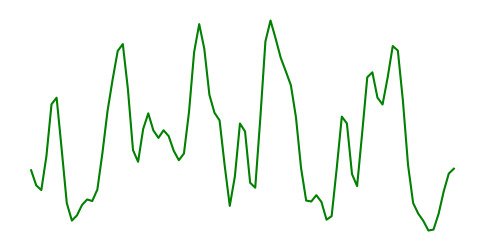

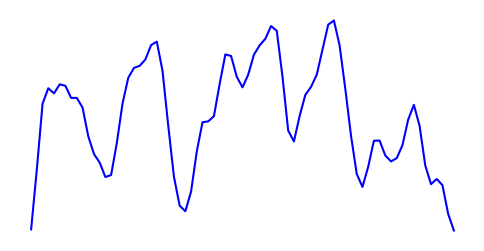

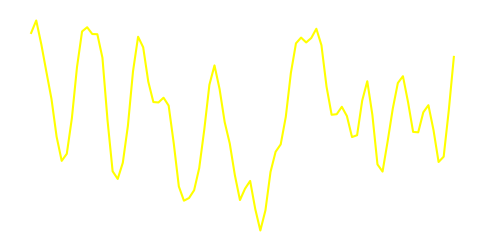

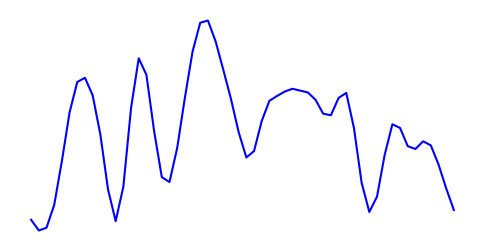

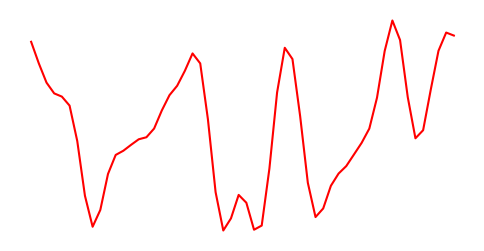

In [4]:
import time
import random
import wave
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import sounddevice as sd
import os

# Configuración de tamaño del gráfico
size = (6, 3)

# Notas pentatónicas
pentatonic_notes = {
    'A': 0,
    'C': 3,
    'D': 5,
    'E': 7,
    'G': 10
}

# Función para generar una nota utilizando el algoritmo de Karplus-Strong
def generate_note_freq(freq):
    sample_rate = 44100
    duration = 1.0
    delay = sample_rate / freq

    # Crea una lista de muestras iniciales aleatorias
    samples = [random.uniform(-1, 1) for _ in range(int(delay))]
    samples = deque(samples)

    # Genera las muestras de la nota
    num_samples = int(sample_rate * duration * 0.01)
    for _ in range(num_samples):
        sample = 0.5 * (samples[0] + samples[1])
        samples.append(sample)
        samples.popleft()

    # Normaliza las muestras entre -32767 y 32767 (rango de valores de 16 bits)
    samples = np.array(samples) * 32767 / max(abs(max(samples)), abs(min(samples)))
    samples = samples.astype(np.int16)

    return samples

# Función para guardar una nota en un archivo WAV
def write_wav_file(filename, samples):
    with wave.open(filename, 'w') as wave_file:
        wave_file.setnchannels(1)  # Mono
        wave_file.setsampwidth(2)  # 16 bits por muestra
        wave_file.setframerate(44100)  # Tasa de muestreo de 44100 Hz
        wave_file.writeframes(samples.tobytes())

# Función para reproducir el audio de una nota
def play_audio(samples):
    sd.play(samples, samplerate=44100)

# Función para visualizar el gráfico de onda de una nota
def visualize_wave(samples, color):
    plt.figure(figsize=size)
    plt.plot(samples, color=color)
    plt.axis('off')
    plt.show()

# Función principal
def main():
    print("""
       |---------------------------------------------------|
       |Generando sonidos con el algoritmo de Karplus-Strong|
       |---------------------------------------------------|
    """)

    # Crea y guarda las notas pentatónicas
    print('Creando notas pentatónicas...')
    for note, shift in pentatonic_notes.items():
        filename = note + '.wav'
        if not os.path.exists(filename):
            frequency = 440.0 * 2 ** (shift / 12)
            samples = generate_note_freq(frequency)
            print('Creando ' + filename + '...')
            write_wav_file(filename, samples)
        else:
            print(filename + ' ya ha sido creado. Saltando al siguiente archivo...')

    # Reproduce y visualiza las notas pentatónicas
    try:
        for _ in range(5):  # Reproducir 5 notas pentatónicas
            note = random.choice(list(pentatonic_notes.keys()))
            filename = note + '.wav'
            samples = generate_note_freq(440.0 * 2 ** (pentatonic_notes[note] / 12))
            color = random.choice(['blue', 'red', 'green', 'yellow', 'orange'])
            play_audio(samples)
            visualize_wave(samples, color)
            time.sleep(1)  # Esperar 1 segundo entre notas
    except KeyboardInterrupt:
        sd.stop()

# Llamada a la función principal
if __name__ == '__main__':
    main()

Este segundo fragmento de código nos muestra las notas musicales en la escala pentatónica.

In [8]:
import random
import numpy as np
from collections import deque
from IPython.display import Audio

# Frecuencias de la escala pentatónica menor (piano C4-Eb-F-G-Bb-C5)
pentatonic_notes = {
    'C4': 261.626,
    'Eb': 311.127,
    'F': 349.228,
    'G': 391.995,
    'Bb': 466.164
}

def generateNote(freq):
    nSamples = 44100
    sampleRate = 44100
    N = int(sampleRate/freq)
    buf = deque([random.random() - 0.5 for i in range(N)])

    samples = np.array([0]*nSamples, 'float32')
    for i in range(nSamples):
        samples[i] = buf[0]
        avg = 0.995*0.5*(buf[0] + buf[1])
        buf.append(avg)
        buf.popleft()

    samples = np.array(samples * 32767, 'int16')
    return samples

for note_name, freq in pentatonic_notes.items():
    print(note_name)
    note = generateNote(freq)
    display(Audio(note, rate=44100))

C4


Eb


F


G


Bb


## Conclusiones

## Verificación

## Referencias